In [ ]:
import geopandas as gpd
import pandas as pd
import geodatasets
import matplotlib.pyplot as plt
from matplotlib.pyplot import colormaps

#https://geopandas.org/en/stable/docs/user_guide/mapping.html

# Verify the installation by printing the version
print(f"GeoPandas version: {gpd.__version__}")

In [163]:
gdf = gpd.read_file('tl_2024_us_state/tl_2024_us_state.shp')
gdf = gdf.to_crs("EPSG:4326")

df2 = pd.read_csv('cleaned_car_prices.csv')
# df2.state.value_counts()

sales_counts = df2['state'].value_counts().reset_index()
sales_counts.rename(columns={'state':'STUSPS'}, inplace=True) # rename for merge
sales_counts['STUSPS'] = sales_counts['STUSPS'].str.upper() # uppercase for merge

merged_df = gdf.merge(sales_counts, how='left', on='STUSPS')

non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = merged_df
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

# format and convert NaN's to zeroes
us49.rename(columns={'count':'NUM_SALES'}, inplace=True)
us49.fillna(0, inplace=True)



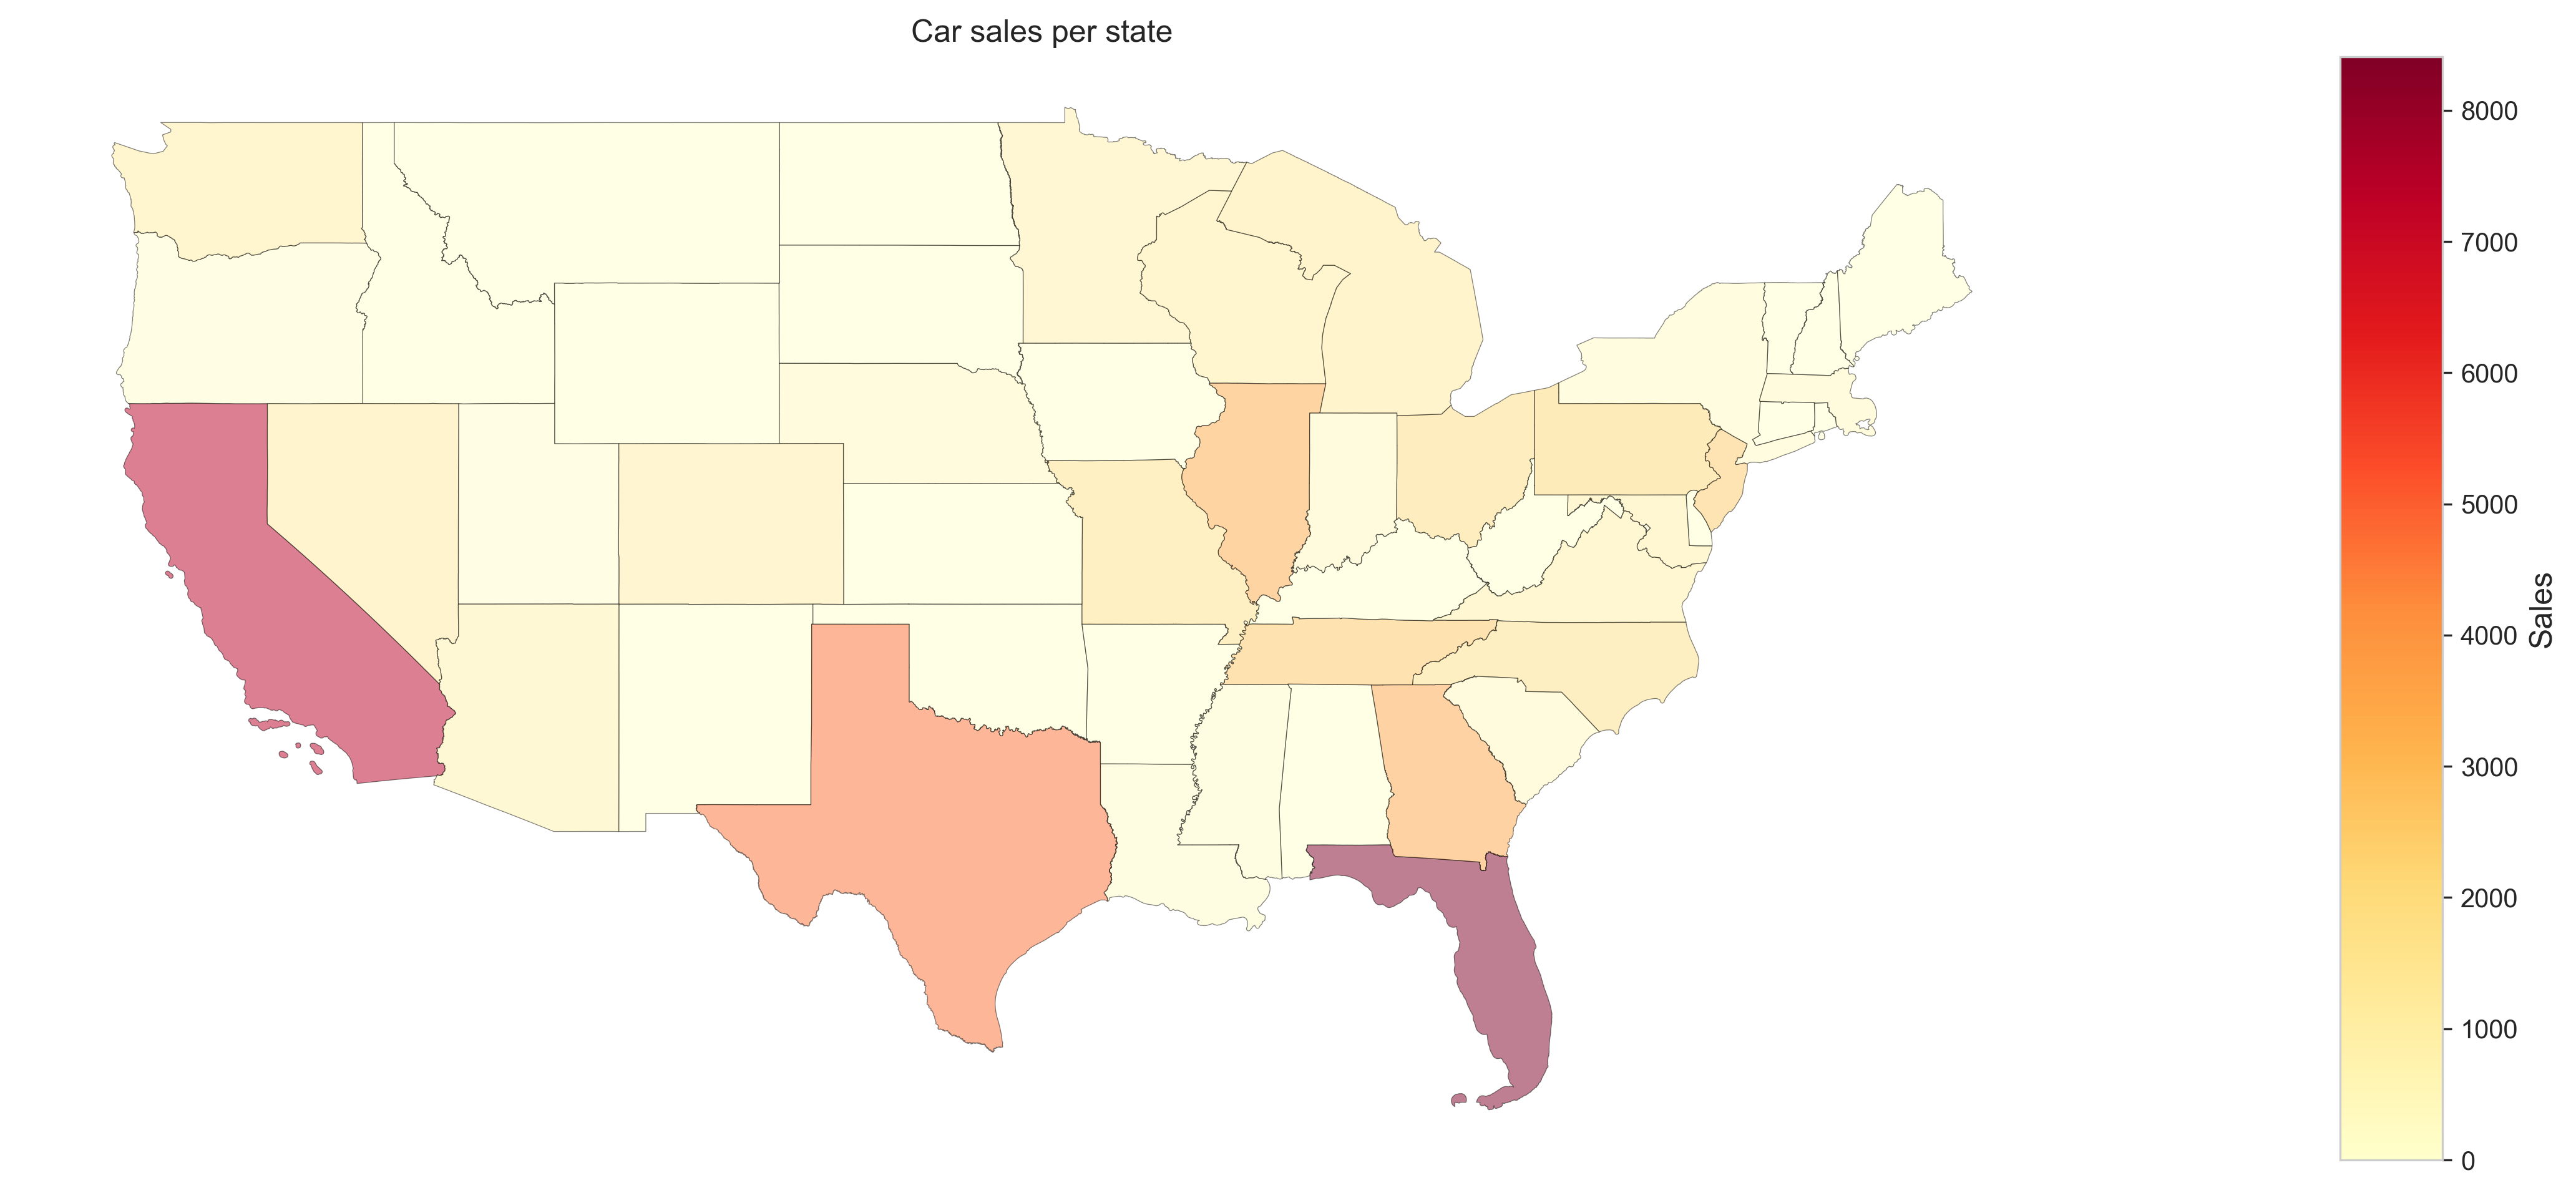

In [181]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def StatesPlot(df,data, cmap):
    f,ax = plt.subplots(1,1, figsize=(15,10),
    sharex=True, sharey=True, dpi=300)
    f.tight_layout()
    plt.title('Car sales per state')
    ax.set_axis_off()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%",
    pad=0.1,alpha=0.5)
    df.plot(data, ax=ax, alpha=0.5, cmap=cmap,
    edgecolor='k', legend=True, cax=cax, linewidth=0.3)
    plt.ylabel('Sales', fontsize=12)
    plt.show()

StatesPlot(us49, 'NUM_SALES', cmap='YlOrRd')